<a href="https://colab.research.google.com/github/costacis21/Brain-Tumor-Radiogenomic-Classification/blob/main/EMBIO_Kriging_with_gams_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


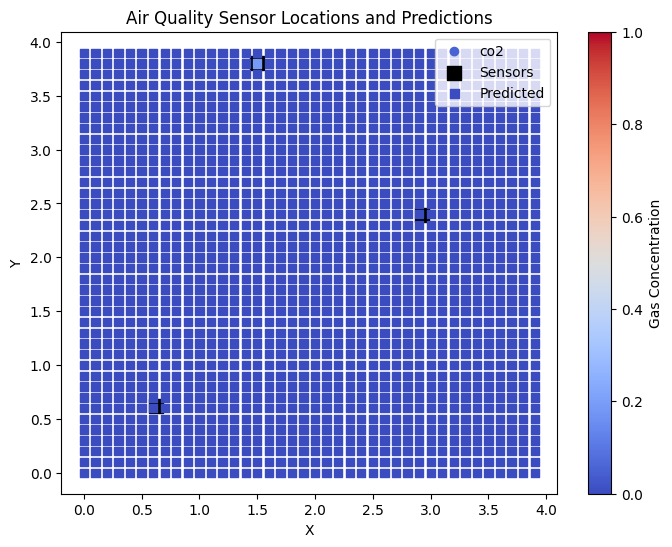

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


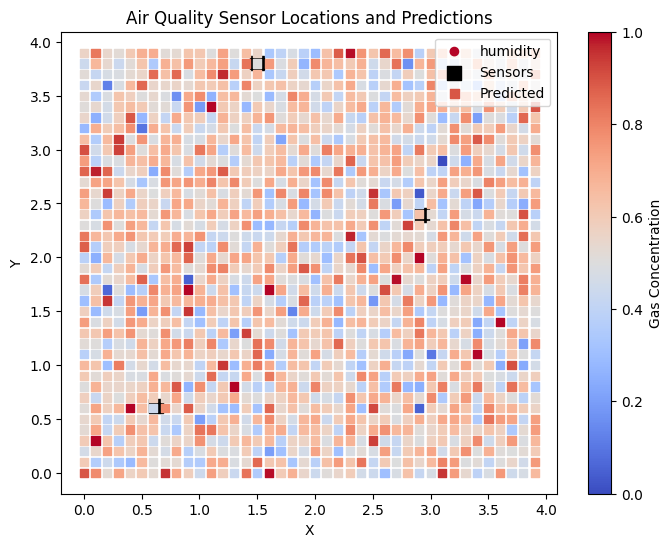

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


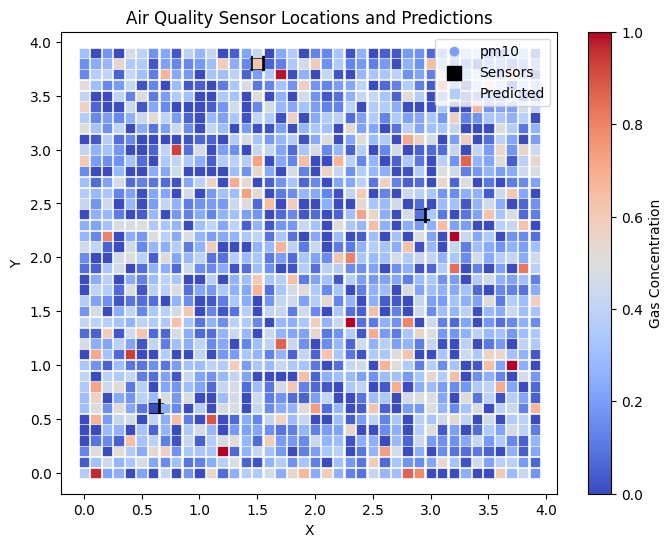

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


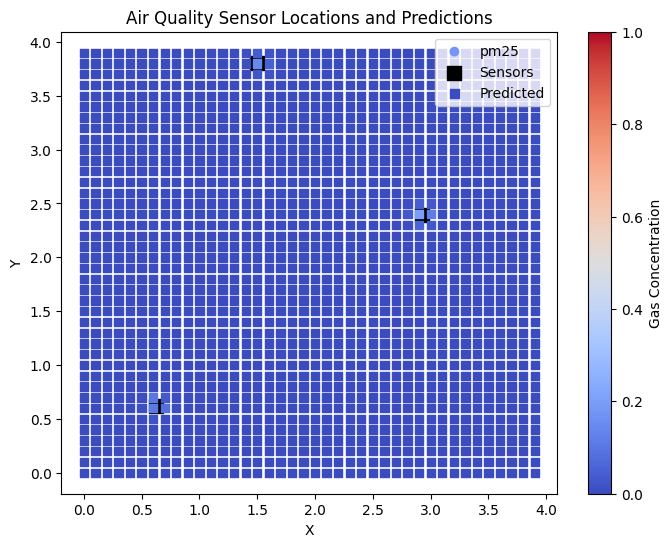

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


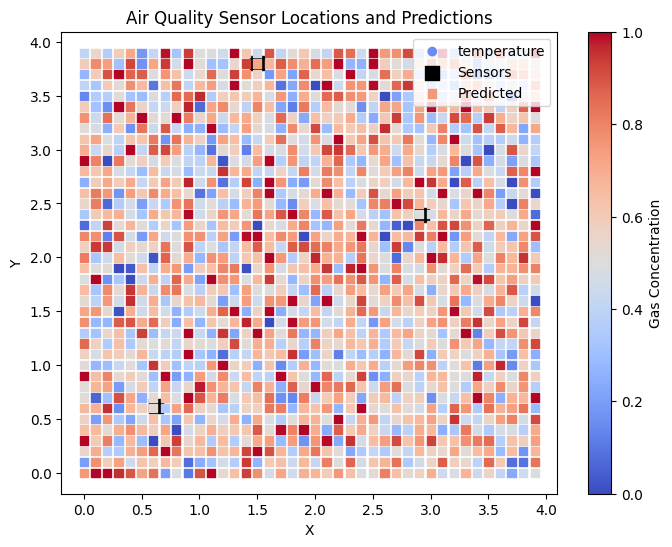

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


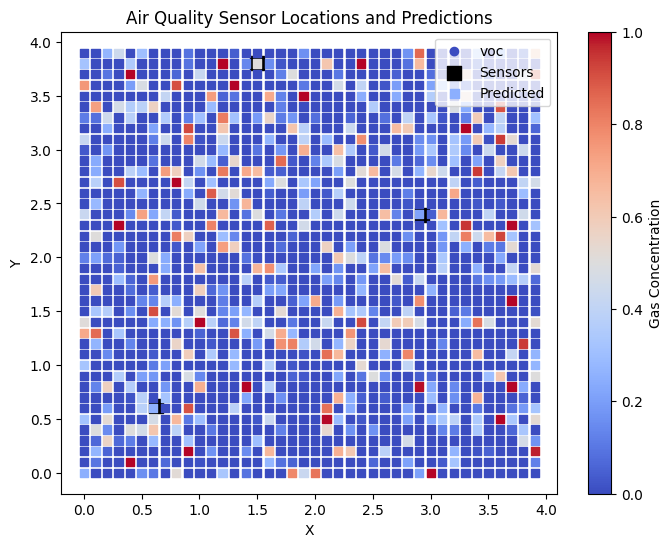

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler


# Read data from CSV file
data = pd.read_csv('gams_indoor.csv', parse_dates=['ts'], dayfirst=True)

# Adjust the interval
interval = pd.Timedelta(minutes=1)
timestamps = pd.date_range(start=data['ts'].min(), end=data['ts'].max(), freq=interval)

# Reindex the data to ensure consistent time intervals
data = data.set_index('ts').reindex(timestamps).reset_index()

# Generate random spatial coordinates for the 3 sensors
np.random.seed(42)
sensor_coordinates = np.random.rand(3, 2) * 4  # Adjust the scale (4) as needed

# Assign spatial coordinates to the data
num_timestamps = len(data)
num_sensors = len(sensor_coordinates)
sensor_coords_repeated = np.tile(sensor_coordinates, (num_timestamps // num_sensors, 1))
remaining_coords = sensor_coordinates[:num_timestamps % num_sensors]
sensor_coords_final = np.concatenate((sensor_coords_repeated, remaining_coords), axis=0)
data['X'], data['Y'] = sensor_coords_final[:, 0], sensor_coords_final[:, 1]

# Columns for kriging modeling
columns = ['co2', 'humidity', 'pm10', 'pm25', 'temperature', 'voc']

# hAlf data
data = data.iloc[:len(data) // 16]
# selected_columns=list(columns[x] for x in [0,2,3])

for gas in columns:

  data.dropna(inplace=True)

  gas_measurements = data[gas].values

  # Kriging modeling and prediction
  X_train = data[['X', 'Y']].values
  y_train = gas_measurements.reshape(-1, 1)

  # Scale the input features
  scaler = MinMaxScaler()
  y_train_scaled = scaler.fit_transform(y_train)

  # Calculate the distance matrix
  dist_matrix = squareform(pdist(X_train, metric='euclidean'))

  # Define the kriging model
  kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
  kriging_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

  # Fit the kriging model
  kriging_model.fit(X_train, y_train_scaled)

  # Generate prediction points on a grid within the room
  grid_resolution = 0.1  # Adjust as needed
  x_grid, y_grid = np.meshgrid(np.arange(0, 4, grid_resolution), np.arange(0, 4, grid_resolution))
  prediction_points = np.column_stack((x_grid.ravel(), y_grid.ravel()))

  # Predict gas concentrations at the prediction points
  y_pred = kriging_model.predict(prediction_points)

  # Visualize the predictions
  plt.figure(figsize=(8, 6))
  plt.scatter(data['X'], data['Y'], c=data[gas], cmap='coolwarm', label=gas)
  plt.scatter(sensor_coordinates[:, 0], sensor_coordinates[:, 1], c='black', marker='s', s=100, label='Sensors')
  plt.scatter(prediction_points[:, 0], prediction_points[:, 1], c=y_pred, cmap='coolwarm', vmin=0, vmax=1,
              marker='s', label='Predicted')
  plt.colorbar(label='Gas Concentration')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Air Quality Sensor Locations and Predictions')
  plt.legend()
  plt.show()
